<h3>可用于产品的线性回归算法建流程</h3>
<h4>数据准备阶段</h4>

1.载入数据集

2.数据预览

3.获取特征数据和输出数据

<h4>特征工程阶段</h4>

4.缺失值处理，异常值处理，高级特征生成（若有）

5.划分数据集为训练集和验证集

6.训练集数据的标准化

<h4>模型训练阶段</h4>

7.使用不同的参数在训练集上训练出模型(使用训练集交叉验证是可选的)

8.观察训练集的MSE和RMSE

<h4>模型验证阶段</h4>

9.验证集数据的标准化

10.使用训练出的模型在验证集上做预测，并观察验证集的MSE和RMSE

11.画图观察(可选)

12.重复步骤7-11，选择验证集上MSE或RMSE最小的模型作为模型输出

<h4>算法上线阶段</h4>

13.保存模型，加载模型做预测,共3种方法
    * 使用python pickle API 保存
    * 使用python 加载pickle文件预测
    * 使用sklearn joblib API 保存
    * 使用sklearn joblib API 加载sklearn模型预测
    * 保存为PMML文件
    * 使用PMML Java API加载模型预测

<h5>by Pinard Liu @ 20190131</h5>

<h1>1. 载入数据集</h1>

In [1]:
#载入必要的库，matplotlib用于画图，numpy用于数组操作，pandans用于数据处理
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_csv('.\ccpp.csv')

<h1>2. 数据预览</h1>

In [3]:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.shape

(9568, 5)

<h1>3. 获取特征数据和输出数据</h1>

In [5]:
#获取特征数据
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [6]:
#获取输出数据
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<h1>4. 缺失值处理，异常值处理（若有）</h1>

<h1>5. 划分数据集为训练集和验证集</h1>

In [7]:
#将数据划分为训练集和验证集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


<h1>6. 训练集数据的标准化</h1>

In [8]:
#对训练集数据特征进行归一化，保存均值向量和标准差向量
norm_data_mean = X_train.mean()
print (norm_data_mean)

AT      19.708303
V       54.403151
AP    1013.189242
RH      73.220410
dtype: float64


In [9]:
norm_data_std = X_train.std()
print (norm_data_std)

AT     7.441593
V     12.747985
AP     5.898733
RH    14.625541
dtype: float64


In [10]:
from scipy.stats import zscore
X_train_norm = X_train.apply(zscore)
X_train_norm.head()

,AT,V,AP,RH
9103,0.441025,0.671278,1.086878,-0.558679
6281,1.075342,1.564031,-2.551444,-0.093706
6201,1.380405,1.701317,-0.944208,0.162712
2646,-1.362478,-1.144037,-0.011739,1.089238
3568,1.510763,1.463616,-0.733979,0.112112


<h1>7. 使用不同的参数在训练集上训练出模型(使用训练集交叉验证是可选的)</h1>
    * 不考虑正则化

In [11]:
#训练模型，不考虑正则化
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_norm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print (linreg.intercept_)
print (linreg.coef_)

[454.21842252]
[[-14.68689837  -2.96103407   0.40905751  -2.31169185]]


<h1>8. 观察训练集的MSE和RMSE</h1>
    *  不考虑正则化

In [13]:
y_train_pred = linreg.predict(X_train_norm)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("Train MSE:",metrics.mean_squared_error(y_train, y_train_pred))
# 用scikit-learn计算RMSE
print ("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Train MSE: 20.99974553734626
Train RMSE: 4.582547930720011


<h1>9. 验证集数据的标准化</h1>
    * 只需要做一次即可

In [14]:
#验证模型
#测试集基于训练集的均值和方差进行标准化
X_test_norm = X_test.loc[:,['AT','V','AP','RH']]
X_test_norm['AT'] = (X_test['AT'] - 19.708303)/7.441593
X_test_norm['V'] = (X_test['AT'] - 54.403151)/12.747985
X_test_norm['AP'] = (X_test['AP'] - 1013.189242)/5.898733
X_test_norm['RH'] = (X_test['RH'] - 73.220410)/14.625541
X_test_norm.head()

,AT,V,AP,RH
5014,-0.256437,-2.871289,-0.759357,0.360984
6947,1.329245,-1.945653,-0.293155,-1.403737
9230,-1.162157,-3.400000,1.437725,0.493629
4290,1.391059,-1.909569,0.752833,-1.342201
6477,0.023073,-2.708126,-0.155837,1.283343


<h1>10. 使用训练出的模型在验证集上做预测，并观察验证集的MSE和RMSE</h1>
    *  不考虑正则化

In [15]:
#模型测试集验证，确认最终表现
y_test_pred = linreg.predict(X_test_norm)

# 用scikit-learn计算MSE
print ("Train MSE:",metrics.mean_squared_error(y_test, y_test_pred))
# 用scikit-learn计算RMSE
print ("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Train MSE: 86.35903350105353
Train RMSE: 9.292956122841296


<h1>11. 画图观察(可选)</h1>

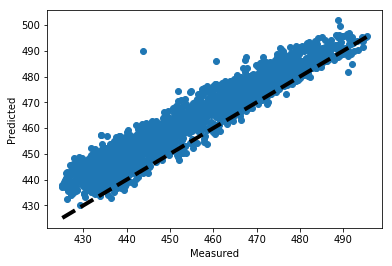

In [16]:
#画图观察
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h1>12. 重复步骤7-11，选择验证集上MSE或RMSE最小的模型作为模型输出</h1>
<h1>7. 使用不同的参数在训练集上训练出模型(使用训练集交叉验证是可选的)</h1>
    * 考虑L2正则化

In [17]:
#加入L2正则化
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_norm, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
print (ridge.intercept_)
print (ridge.coef_)

[454.21842252]
[[-14.6857877   -2.96170729   0.40929435  -2.31128706]]


<h1>8. 观察训练集的MSE和RMSE</h1>
    *  考虑L2正则化

In [19]:
y_train_pred_ridge = ridge.predict(X_train_norm)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("Train MSE:",metrics.mean_squared_error(y_train, y_train_pred_ridge))
# 用scikit-learn计算RMSE
print ("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_ridge)))

Train MSE: 20.999745748547557
Train RMSE: 4.582547953764102


<h1>9. 验证集数据的标准化(之前做过，此处忽略)</h1>
<h1>10. 使用训练出的模型在验证集上做预测，并观察验证集的MSE和RMSE</h1>
    *  考虑L2正则化

In [20]:
#模型测试集L2正则化验证，比较最终表现
y_test_pred_ridge = ridge.predict(X_test_norm)

# 用scikit-learn计算MSE
print ("Train MSE:",metrics.mean_squared_error(y_test, y_test_pred_ridge))
# 用scikit-learn计算RMSE
print ("Train RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))

Train MSE: 86.3891373545495
Train RMSE: 9.294575695240182


<h1>11. 画图观察(可选)</h1>

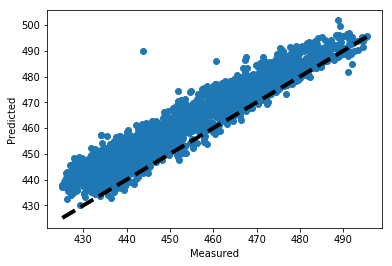

In [21]:
#画图观察
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred_ridge)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h1>12. 重复步骤7-11，选择验证集上MSE或RMSE最小的模型作为模型输出</h1>

<h1>13. 保存模型，加载模型做预测,第一种方法</h1>
    * 使用python pickle API 保存
    * 使用python 加载pickle文件预测

In [22]:
#保存模型方法1

# 保存成python支持的文件格式pickle, 在当前目录下可以看到regression.pickle
import pickle
with open('regression.pickle', 'wb') as fw:
    pickle.dump(ridge, fw)

In [23]:
#加载并预测

# 加载regression.pickle
with open('regression.pickle', 'rb') as fr:
    new_ridge = pickle.load(fr)
    test_data = np.array([
        [(1- 19.708303)/7.441593, (1- 54.403151)/12.747985, (1- 1013.189242)/5.898733,(1- 73.220410)/14.625541],
        [(2- 19.708303)/7.441593, (2- 54.403151)/12.747985, (2- 1013.189242)/5.898733,(2- 73.220410)/14.625541]
    ])
    result = new_ridge.predict(test_data)
    print (result)


[[444.72624337]
 [442.43179818]]


<h1>13. 保存模型，加载模型做预测,第二种方法</h1>
    * 使用sklearn joblib API 保存
    * 使用sklearn joblib API 加载sklearn模型预测

In [24]:
#保存模型方法2

#保存成sklearn自带的文件格式
from sklearn.externals import joblib
joblib.dump(ridge, 'regression.pkl')

['regression.pkl']

In [25]:
new_ridge2 = joblib.load('regression.pkl')
result2 = new_ridge2.predict(test_data)
print (result2)

[[444.72624337]
 [442.43179818]]


<h1>13. 保存模型，加载模型做预测,第三种方法</h1>
    * 保存为PMML文件
    * 使用PMML Java API加载模型预测    

In [26]:
#保存模型方法3,跨平台用，可以用于线上Java调用
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
regression_pipeline = PMMLPipeline([("regresser", Ridge(alpha = 0.1))])
regression_pipeline.fit(X_train_norm, y_train)

PMMLPipeline(steps=[('regresser', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [27]:
result3 = regression_pipeline.predict(test_data)
print (result3)

[[444.72624337]
 [442.43179818]]


使用PMML Java API加载模型预测的实例参见：

[用PMML实现机器学习模型的跨平台上线](https://www.cnblogs.com/pinard/p/9220199.html)

[PMML跨平台上线相关实例代码](https://github.com/ljpzzz/machinelearning/blob/master/model-in-product/sklearn-jpmml)